<a href="https://colab.research.google.com/github/LuisGeralda/LTE-KPI-Kmeans-Clustering/blob/main/LTE_KPI_Kmeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import Dataset from my GitHub**

In [21]:
import requests
import zipfile
import io

# Download the ZIP file from GitHub
url = 'https://github.com/LuisGeralda/LTE-KPI-Kmeans-Clustering/raw/main/Dataset.zip'
response = requests.get(url)

# Extract the ZIP file
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    z.extractall('Dataset')

#**Merging the .csv files into one dataframe**


*I have 135 csv files and I want to merge into one PANDAS Dataframe.*

In [22]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

import os
import io
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_digits
import os
import glob
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster


In [23]:

# Load data from multiple files and folders
def load_data(base_path):
    data_frames = []
    for folder in os.listdir(base_path):
        folder_path = os.path.join(base_path, folder)
        if os.path.isdir(folder_path):
            for file in glob.glob(os.path.join(folder_path, '*.csv')):
                df = pd.read_csv(file)
                df['TransportMode'] = folder  # Add transport mode as a feature
                data_frames.append(df)
    return pd.concat(data_frames, ignore_index=True)

# Load and preprocess data
base_path = 'Dataset/Dataset'
df = load_data(base_path)
df.head(5)


,Timestamp,Longitude,Latitude,Speed,Operatorname,CellID,NetworkMode,RSRP,RSRQ,SNR,...,RSSI,DL_bitrate,UL_bitrate,State,NRxRSRP,NRxRSRQ,ServingCell_Lon,ServingCell_Lat,ServingCell_Distance,TransportMode
0,2018.02.02_12.04.44,-9.217353,52.085426,17,B,3,LTE,-91,-10,16.0,...,-69,40698,752,D,-94.0,-16.0,-9.224267,52.08345,521.01999999999998,train
1,2018.02.02_12.04.45,-9.217570,52.085445,20,B,3,LTE,-91,-10,16.0,...,-69,40698,752,D,-94.0,-16.0,-9.224267,52.08345,508.54000000000002,train
2,2018.02.02_12.04.45,-9.217570,52.085445,20,B,3,LTE,-86,-12,16.0,...,-69,39311,756,D,-90.0,-18.0,-9.224267,52.08345,508.54000000000002,train
3,2018.02.02_12.04.46,-9.217570,52.085445,20,B,3,LTE,-86,-12,16.0,...,-69,44467,838,D,-90.0,-18.0,-9.224267,52.08345,508.54000000000002,train
4,2018.02.02_12.04.47,-9.217570,52.085445,20,B,3,LTE,-84,-12,17.0,...,-67,45563,843,D,-,-,-9.224267,52.08345,508.54000000000002,train


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174523 entries, 0 to 174522
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Timestamp             174523 non-null  object 
 1   Longitude             174523 non-null  float64
 2   Latitude              174523 non-null  float64
 3   Speed                 174523 non-null  int64  
 4   Operatorname          174523 non-null  object 
 5   CellID                174523 non-null  int64  
 6   NetworkMode           174523 non-null  object 
 7   RSRP                  174523 non-null  int64  
 8   RSRQ                  174523 non-null  object 
 9   SNR                   174523 non-null  object 
 10  CQI                   174523 non-null  object 
 11  RSSI                  174523 non-null  object 
 12  DL_bitrate            174523 non-null  int64  
 13  UL_bitrate            174523 non-null  int64  
 14  State                 174523 non-null  object 
 15  

#**Data Preprocessing**



*1. Handling null values*

(174523, 21)


<Axes: >

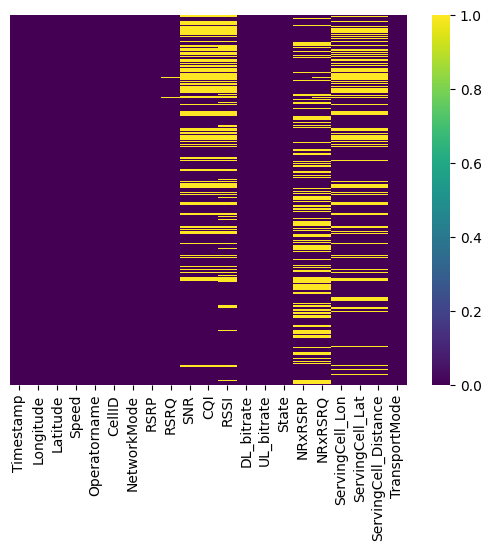

In [25]:
df.replace('-', np.nan, inplace=True)  # Replace '-' with NaN
print(df.shape)
df.head(5)
df.isnull().sum()
sns.heatmap(df.isnull(), yticklabels=False, cmap= "viridis")

*2. Dropping rows with NaN values*

(56139, 21)


<Axes: >

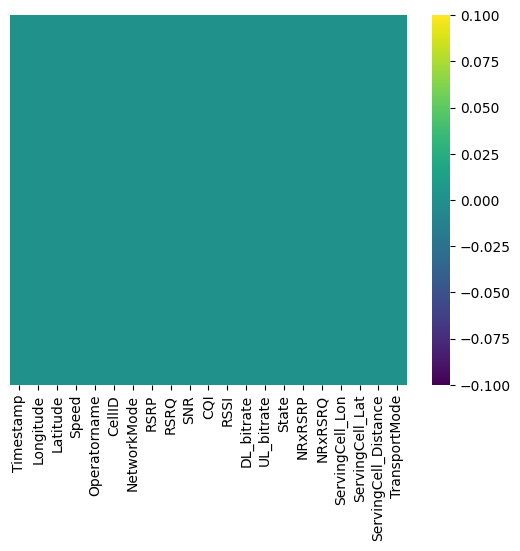

In [26]:
df.dropna(inplace=True)
print(df.shape)
df.isnull().sum()
sns.heatmap(df.isnull(), yticklabels=False, cmap= "viridis")

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56139 entries, 0 to 174520
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Timestamp             56139 non-null  object 
 1   Longitude             56139 non-null  float64
 2   Latitude              56139 non-null  float64
 3   Speed                 56139 non-null  int64  
 4   Operatorname          56139 non-null  object 
 5   CellID                56139 non-null  int64  
 6   NetworkMode           56139 non-null  object 
 7   RSRP                  56139 non-null  int64  
 8   RSRQ                  56139 non-null  object 
 9   SNR                   56139 non-null  object 
 10  CQI                   56139 non-null  object 
 11  RSSI                  56139 non-null  object 
 12  DL_bitrate            56139 non-null  int64  
 13  UL_bitrate            56139 non-null  int64  
 14  State                 56139 non-null  object 
 15  NRxRSRP               5

*2. Delete unused columns in the Dataframe*

In [28]:
location_data = df[['Latitude', 'Longitude']]
location_data.head(5)
df.drop(columns=['Timestamp','Longitude','Latitude','Speed','Operatorname','CellID','NetworkMode','ServingCell_Lon','ServingCell_Lat','State','ServingCell_Distance','TransportMode'], inplace=True)
df.head(5)

,RSRP,RSRQ,SNR,CQI,RSSI,DL_bitrate,UL_bitrate,NRxRSRP,NRxRSRQ
0,-91,-10,16.0,11,-69,40698,752,-94.0,-16.0
1,-91,-10,16.0,11,-69,40698,752,-94.0,-16.0
2,-86,-12,16.0,11,-69,39311,756,-90.0,-18.0
3,-86,-12,16.0,11,-69,44467,838,-90.0,-18.0
14,-88,-12,15.0,11,-71,40486,752,-94.0,-18.0


##*Type casting to integer*

Issues are seen while trying to handle data because of the type.
Changing to integer should help.[link text](https://)

In [29]:
print(df.columns)
df = pd.DataFrame(df)
dataframe_columns=df.columns
df = df.apply(pd.to_numeric, errors='coerce')
df.info()

Index(['RSRP', 'RSRQ', 'SNR', 'CQI', 'RSSI', 'DL_bitrate', 'UL_bitrate',
       'NRxRSRP', 'NRxRSRQ'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 56139 entries, 0 to 174520
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RSRP        56139 non-null  int64  
 1   RSRQ        56139 non-null  int64  
 2   SNR         56139 non-null  float64
 3   CQI         56139 non-null  int64  
 4   RSSI        56139 non-null  int64  
 5   DL_bitrate  56139 non-null  int64  
 6   UL_bitrate  56139 non-null  int64  
 7   NRxRSRP     56139 non-null  float64
 8   NRxRSRQ     56139 non-null  float64
dtypes: float64(3), int64(6)
memory usage: 4.3 MB


*Using all dimensions without proper preprocessing and feature selection can lead to several issues:*

Curse of Dimensionality: High-dimensional data can make clustering algorithms less effective due to increased sparsity, making it harder to identify meaningful clusters.

Redundancy: Highly correlated features provide similar information, leading to redundancy. This can result in overemphasis on certain patterns and skew clustering results.

Noise: Including irrelevant or noisy features can obscure important patterns, reducing the accuracy and interpretability of the clustering.

Computational Complexity: More features increase computational costs, making the algorithm slower and requiring more resources.

Example:
RSRP and RSRQ: These are often correlated as they both measure signal quality.
RSSI: This could be redundant if combined with RSRP and RSRQ.
DL_bitrate and UL_bitrate: Including both could be useful but also add complexity.
Best Practices:
Dimensionality Reduction: Use PCA or other techniques to reduce dimensions while retaining most information.
Feature Selection: Select the most relevant features using correlation analysis or domain knowledge.
Normalization: Ensure all features are on a similar scale to avoid biasing the algorithm.*

*By addressing these issues, the clustering results will be more accurate, meaningful, and computationally efficient.*







Best Practices:

*Dimensionality Reduction*: Use PCA or other techniques to reduce dimensions while retaining most information.


*Feature Selection*: Select the most relevant features using correlation analysis or domain knowledge.

*Normalization*: Ensure all features are on a similar scale to avoid biasing the algorithm.

To reduce the dimensions (Number of features to be considered into the algorithm) we have few options we can explore and for this project I will focus on

**Normalize the features**

In [30]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

**PCA for Dimensionality Reduction**

In [31]:
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
df_pca = pca.fit_transform(df_scaled)
print("Explained variance ratio by PCA components:", pca.explained_variance_ratio_)


Explained variance ratio by PCA components: [0.4801518  0.19574092]


#PCA Explained Variance Ratio#

The two principal components explain approximately 65.91% (0.46964701 + 0.18941351) of the variance in the data. This indicates that the reduced dimensionality retains a significant portion of the information in the original dataset.

**Plot PCA Components**

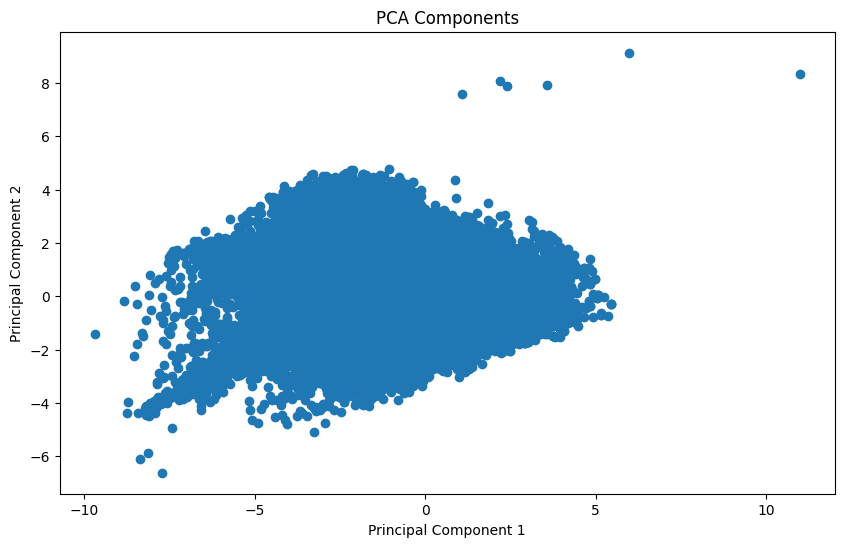

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1])
plt.title('PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#**K-Means Clustering**

*1. Find the number of clusters*

Elbow method is ...

[Elbow cluster reference](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

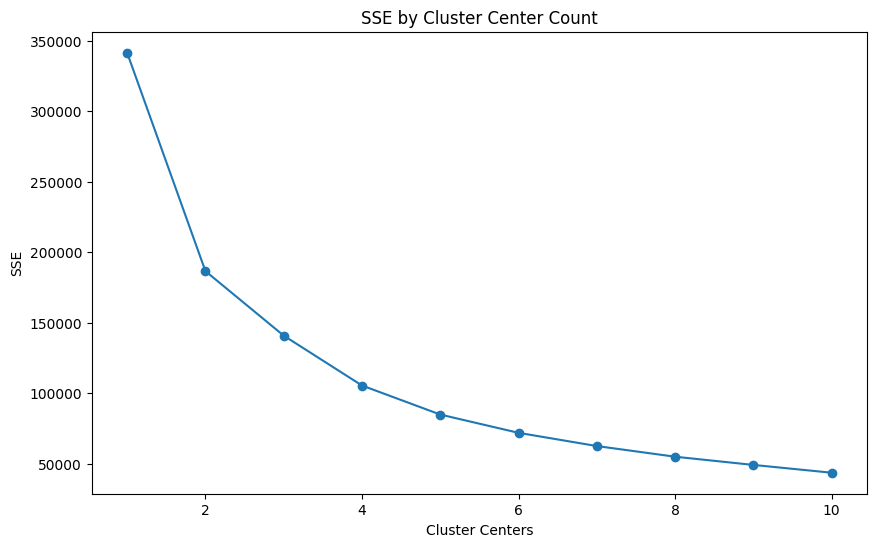

In [33]:
# Determine the optimal number of clusters using the elbow method
def find_optimal_clusters(data, max_k):
    iters = range(1, max_k + 1)
    sse = []
    for k in iters:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    plt.figure(figsize=(10, 6))
    plt.plot(iters, sse, marker='o')
    plt.xlabel('Cluster Centers')
    plt.ylabel('SSE')
    plt.title('SSE by Cluster Center Count')
    plt.show()

# Plot the elbow curve to find the optimal number of clusters
find_optimal_clusters(df_pca, 10)


*2. K-means Clustering*

In [34]:
# Perform K-means clustering
optimal_clusters = 4  # Example, set this based on the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


*3. Evaluating the Clustering using Silhouette Score*

In [35]:
# Evaluate clustering using silhouette score
score = silhouette_score(df_scaled, df['Cluster'])
print(f'Silhouette Score: {score}')

Silhouette Score: 0.2205739265904696


#Summary of Results#



Silhouette Score
A score of 0.23 shows moderate clustering performance. It suggests there is room for improvement, either by refining features, experimenting with different cluster counts, or trying alternative algorithms.
This approach allows you to visualize and analyze LTE coverage quality and identify areas for optimization.

*4. Visualize the clusters using PCA*

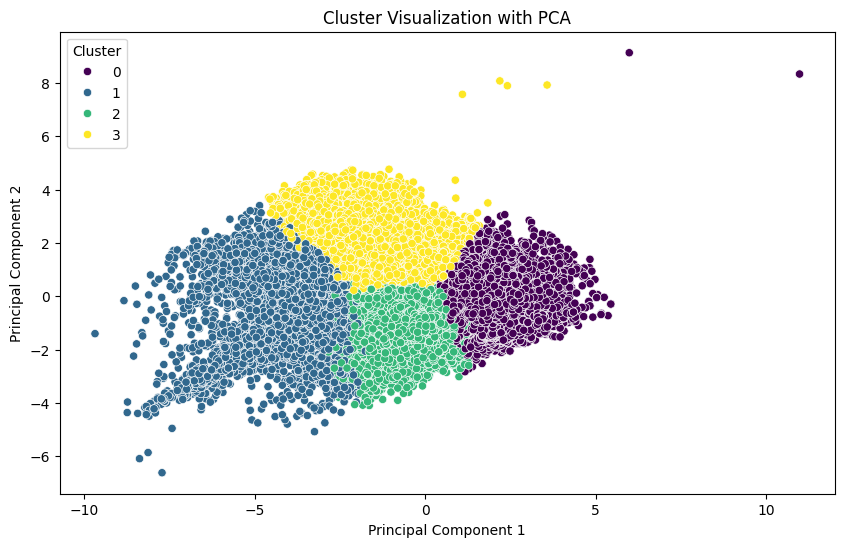

In [36]:
# Visualize the clusters using PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('Cluster Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# **Cluster Characteristics**

**Cluster 0:** Represents regions with low RSRP, RSRQ, and SNR values indicating poor signal quality, likely at cell edges.

**Cluster 1:** Areas with moderate signal quality and higher bitrates.

**Cluster 2:** Indicates regions with good signal strength but lower bitrates.

**Cluster 3:** Represents high-quality coverage areas with excellent signal strength and bitrates.

*5. Analyze clusters centers*

In [37]:
# Analyze cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_df = pd.DataFrame(cluster_centers, columns=dataframe_columns)
print(cluster_df)

# Additional insights
for i in range(optimal_clusters):
    cluster_data = df[df['Cluster'] == i]
    print(f"Cluster {i} Summary:")
    print(cluster_data.describe())

         RSRP       RSRQ        SNR        CQI       RSSI    DL_bitrate  \
0 -108.871687 -15.369912  -2.576131   5.632319 -89.584236   3720.999499   
1  -85.540077 -11.256624  11.942676  10.482920 -68.322780  36932.042826   
2 -101.991204 -11.914183   4.988945   7.558942 -84.833008  15790.845407   
3  -87.541427 -13.566926   1.121230   7.090054 -70.522874   7346.202474   

   UL_bitrate     NRxRSRP    NRxRSRQ  
0   76.471633 -109.609689 -17.039750  
1  545.745209  -90.673554 -13.835861  
2  270.368861 -103.411617 -14.085878  
3  132.829465  -90.367672 -16.372331  
Cluster 0 Summary:
               RSRP          RSRQ           SNR           CQI          RSSI  \
count  21965.000000  21965.000000  21965.000000  21965.000000  21965.000000   
mean    -108.865422    -15.370590     -2.577373      5.632142    -89.579012   
std        7.464443      2.098939      4.440319      1.790418      4.746440   
min     -138.000000    -24.000000    -30.000000      1.000000    -94.000000   
25%     -115.00

#**Create a map with clusters**#

In [38]:
# Join location data with df
df_combined = df.join(location_data)

# Iterate through combined DataFrame for mapping
for _, row in df_combined.iterrows():
    if row['Cluster'] == 2:
        marker_color = '#FF0000'  # Red for emphasis
        tooltip_text = (
            f"<b>Cluster {row['Cluster']}</b><br>"
            f"RSRP: {row['RSRP']}<br>"
            f"RSRQ: {row['RSRQ']}<br>"
            f"SNR: {row['SNR']}<br>"
            f"CQI: {row['CQI']}<br>"
            f"RSSI: {row['RSSI']}<br>"
            f"DL_bitrate: {row['DL_bitrate']}<br>"
            f"UL_bitrate: {row['UL_bitrate']}<br>"
            f"NRxRSRP: {row['NRxRSRP']}<br>"
            f"NRxRSRQ: {row['NRxRSRQ']}<br>"
        )
    else:
        marker_color = '#3186cc' if row['Cluster'] == 0 else '#FF5733' if row['Cluster'] == 1 else '#33FF57'
        tooltip_text = (
            f"Cluster: {row['Cluster']}<br>"
            f"RSRP: {row['RSRP']}<br>"
            f"RSRQ: {row['RSRQ']}<br>"
            f"SNR: {row['SNR']}<br>"
            f"CQI: {row['CQI']}<br>"
            f"RSSI: {row['RSSI']}<br>"
            f"DL_bitrate: {row['DL_bitrate']}<br>"
            f"UL_bitrate: {row['UL_bitrate']}<br>"
            f"NRxRSRP: {row['NRxRSRP']}<br>"
            f"NRxRSRQ: {row['NRxRSRQ']}<br>"
        )

    folium.CircleMarker(
        location=(row['Latitude'], row['Longitude']),
        radius=5,
        color=marker_color,
        fill=True,
        fill_color=marker_color,
        fill_opacity=0.7,
        tooltip=tooltip_text
    ).add_to(marker_cluster)

# Step 9: Add a legend to the map
legend_html = """
<div style="position: fixed;
            bottom: 50px; left: 50px; width: 300px; height: 150px;
            background-color: white; z-index:9999; font-size:14px;
            border:2px solid grey; border-radius:6px; padding: 10px;">
    <h4>Cluster Legend</h4>
    <i class="fa fa-circle" style="color:#3186cc"></i> Cluster 0<br>
    <i class="fa fa-circle" style="color:#FF5733"></i> Cluster 1<br>
    <i class="fa fa-circle" style="color:#FF0000"></i> Cluster 2<br>
    <i class="fa fa-circle" style="color:#33FF57"></i> Cluster 3<br>
</div>
"""
m.get_root().html.add_child(folium.Element(legend_html))

# Step 10: Save map
m.save("lte_coverage_clusters_emphasized.html")

# Display map in notebook (if running in a Jupyter environment)
m